数据探索性分析:https://blog.csdn.net/qq_42374697/article/details/108978436

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)


D:\DevelopmentTool\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
DATA_PATH = "D:/Data/jupter notebook/data/breast-cancer-wisconsin.data"

# create the column names
columnNames = [
    'Sample code number',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
]

df = pd.read_csv(DATA_PATH, names = columnNames)
# show the shape of data
df.shape

# use standard missing value to replace "?"
df = df.replace(to_replace = "?", value = np.nan)
# then drop the missing value
df = df.dropna(how = 'any')

df.shape

(683, 11)

In [3]:
df.drop_duplicates(inplace=True)
df.index = range(df.shape[0])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           675 non-null    int64 
 1   Clump Thickness              675 non-null    int64 
 2   Uniformity of Cell Size      675 non-null    int64 
 3   Uniformity of Cell Shape     675 non-null    int64 
 4   Marginal Adhesion            675 non-null    int64 
 5   Single Epithelial Cell Size  675 non-null    int64 
 6   Bare Nuclei                  675 non-null    object
 7   Bland Chromatin              675 non-null    int64 
 8   Normal Nucleoli              675 non-null    int64 
 9   Mitoses                      675 non-null    int64 
 10  Class                        675 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 58.1+ KB


In [5]:
# 缺失情况
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
df.drop(['Sample code number'],axis=1,inplace=True)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Clump Thickness,675.0,NaN,NaN,NaN,4.451852,2.820859,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,675.0,NaN,NaN,NaN,3.146667,3.055005,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,675.0,NaN,NaN,NaN,3.208889,2.976552,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,675.0,NaN,NaN,NaN,2.848889,2.875917,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,675.0,NaN,NaN,NaN,3.22963,2.208497,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,675,10,1,397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bland Chromatin,675.0,NaN,NaN,NaN,3.442963,2.453894,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,675.0,NaN,NaN,NaN,2.885926,3.065607,1.0,1.0,1.0,4.0,10.0
Mitoses,675.0,NaN,NaN,NaN,1.607407,1.741006,1.0,1.0,1.0,1.0,10.0
Class,675.0,NaN,NaN,NaN,2.699259,0.954413,2.0,2.0,2.0,4.0,4.0


In [8]:
for i, item in enumerate(df):
    print('%s:%s'%(item,df[item].unique()))

Clump Thickness:[ 5  3  6  4  8  1  2  7 10  9]
Uniformity of Cell Size:[ 1  4  8 10  2  3  7  5  6  9]
Uniformity of Cell Shape:[ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion:[ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size:[ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei:['1' '10' '2' '4' '3' '9' '7' '5' '8' '6']
Bland Chromatin:[ 3  9  1  2  4  5  7  8  6 10]
Normal Nucleoli:[ 1  2  7  4  5  3 10  6  9  8]
Mitoses:[ 1  5  4  2  3  7 10  8  6]
Class:[2 4]


In [9]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              675 non-null    int64
 1   Uniformity of Cell Size      675 non-null    int64
 2   Uniformity of Cell Shape     675 non-null    int64
 3   Marginal Adhesion            675 non-null    int64
 4   Single Epithelial Cell Size  675 non-null    int64
 5   Bare Nuclei                  675 non-null    int64
 6   Bland Chromatin              675 non-null    int64
 7   Normal Nucleoli              675 non-null    int64
 8   Mitoses                      675 non-null    int64
 9   Class                        675 non-null    int64
dtypes: int64(10)
memory usage: 52.9 KB


In [10]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,675.0,4.451852,2.820859,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,675.0,3.146667,3.055005,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,675.0,3.208889,2.976552,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,675.0,2.848889,2.875917,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,675.0,3.229630,2.208497,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,675.0,3.537778,3.637871,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,675.0,3.442963,2.453894,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,675.0,2.885926,3.065607,1.0,1.0,1.0,4.0,10.0
Mitoses,675.0,1.607407,1.741006,1.0,1.0,1.0,1.0,10.0
Class,675.0,2.699259,0.954413,2.0,2.0,2.0,4.0,4.0


数据可视化

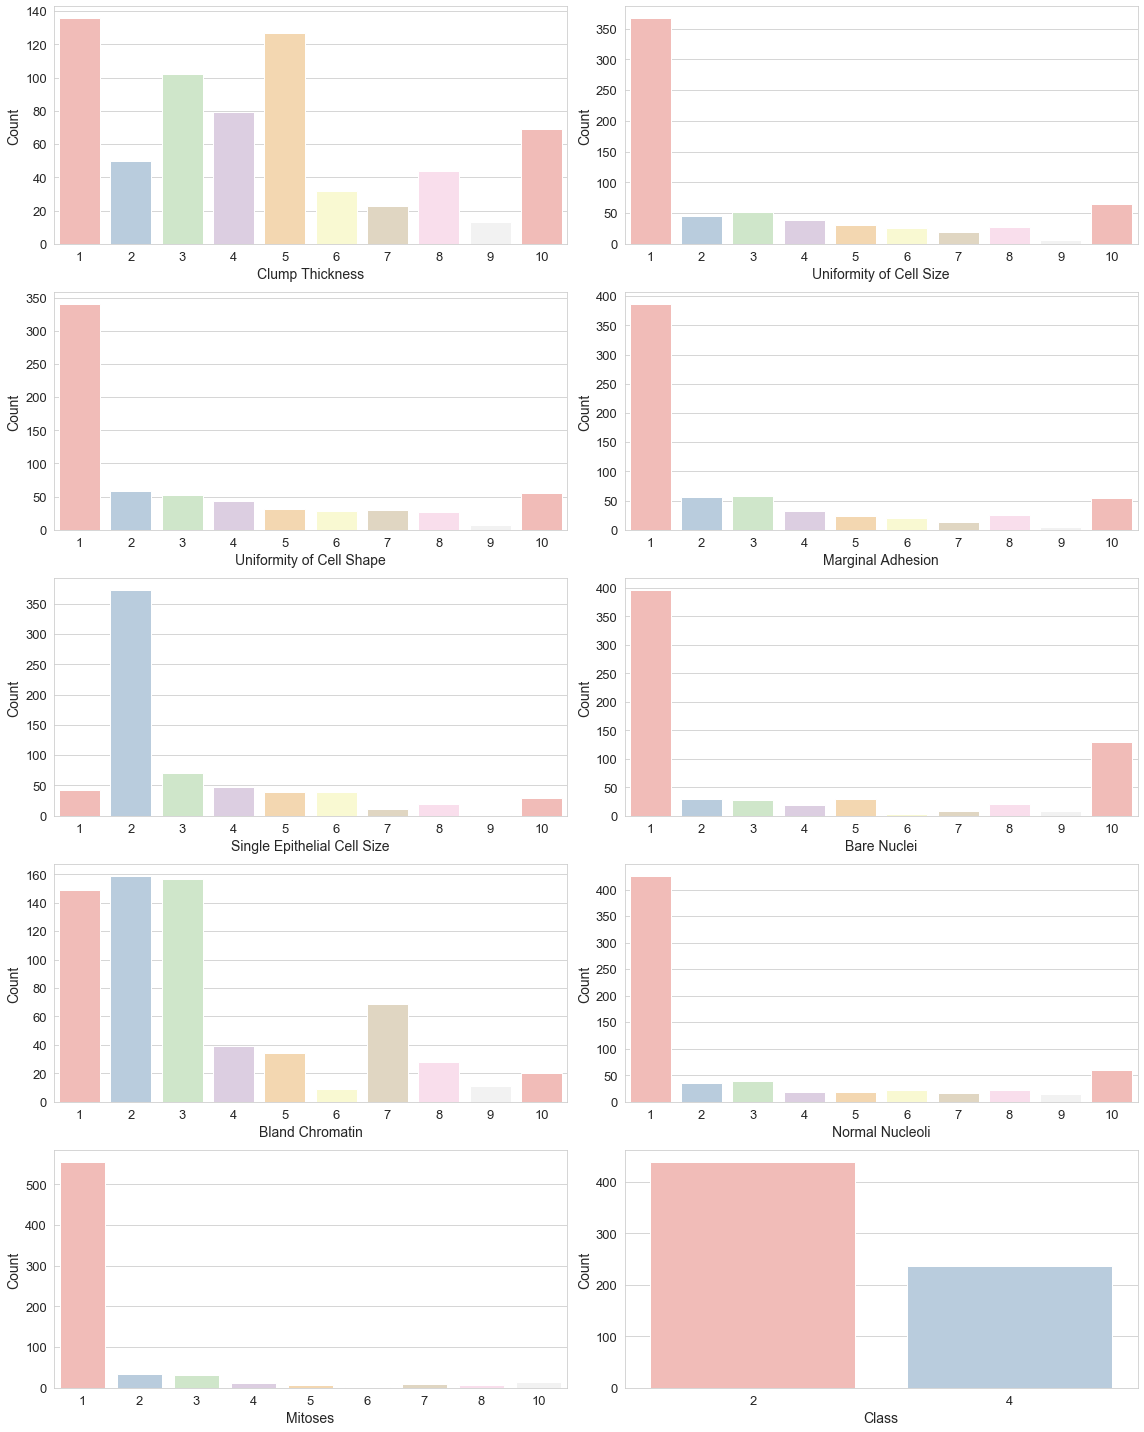

In [11]:
sns.set_style("whitegrid") # 使用whitegrid主题
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(16,20))
for i, item in enumerate(df):
    plt.subplot(5,2,(i+1))
    #ax=df[item].value_counts().plot(kind = 'bar')
    ax=sns.countplot(item,data = df,palette="Pastel1")
    plt.xlabel(str(item),fontsize=14)   
    plt.ylabel('Count',fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    #plt.title("Churn by "+ str(item))
    i=i+1
    plt.tight_layout()
plt.show()

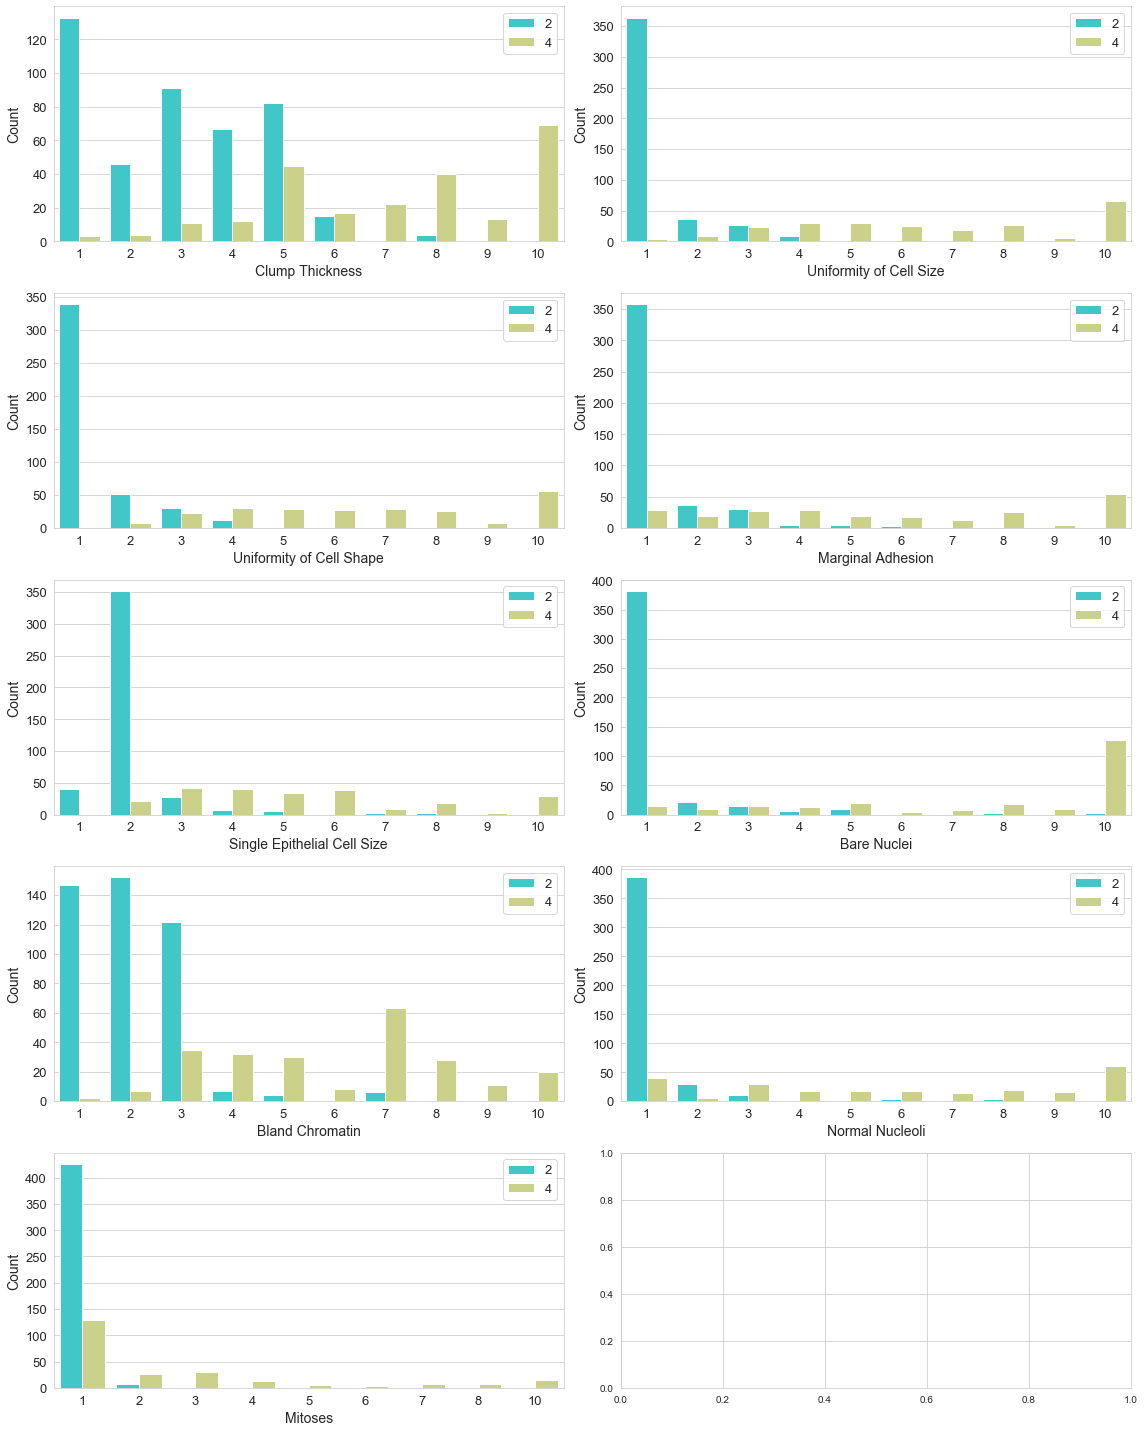

In [12]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(16,20))
for i, item in enumerate(df):
    if i!=9:
        plt.subplot(5,2,(i+1))
        ax=sns.countplot(x = item,hue = 'Class',data = df,palette="rainbow")
        plt.xlabel(str(item),fontsize=14)   
        plt.ylabel('Count',fontsize=14)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.legend(loc='upper right',fontsize=13)
        #plt.title("Churn by "+ str(item))
        i=i+1
        plt.tight_layout()
plt.show()

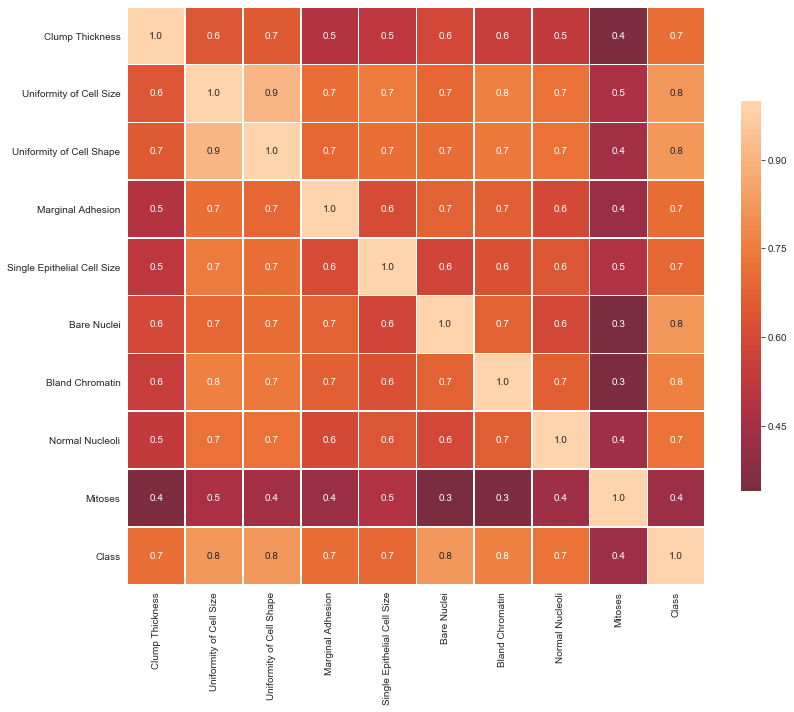

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt='.1f')
plt.tight_layout()

建模与模型评估
决策树

In [14]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

#将数据划分为标签和特征
X = df.drop(['Class'],axis = 1)
y = df['Class']

In [15]:
# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

#恢复索引(不影响结果)
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

# 建立模型
clf = tree.DecisionTreeClassifier(criterion="entropy",
									random_state=30, # 设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显
									splitter="random" # 控制决策树中的随机选项
									)
# 训练
clf = clf.fit(Xtrain, Ytrain) 
#返回预测的准确度
score = clf.score(Xtest, Ytest) 
score  # 0.9519230769230769


0.9310344827586207

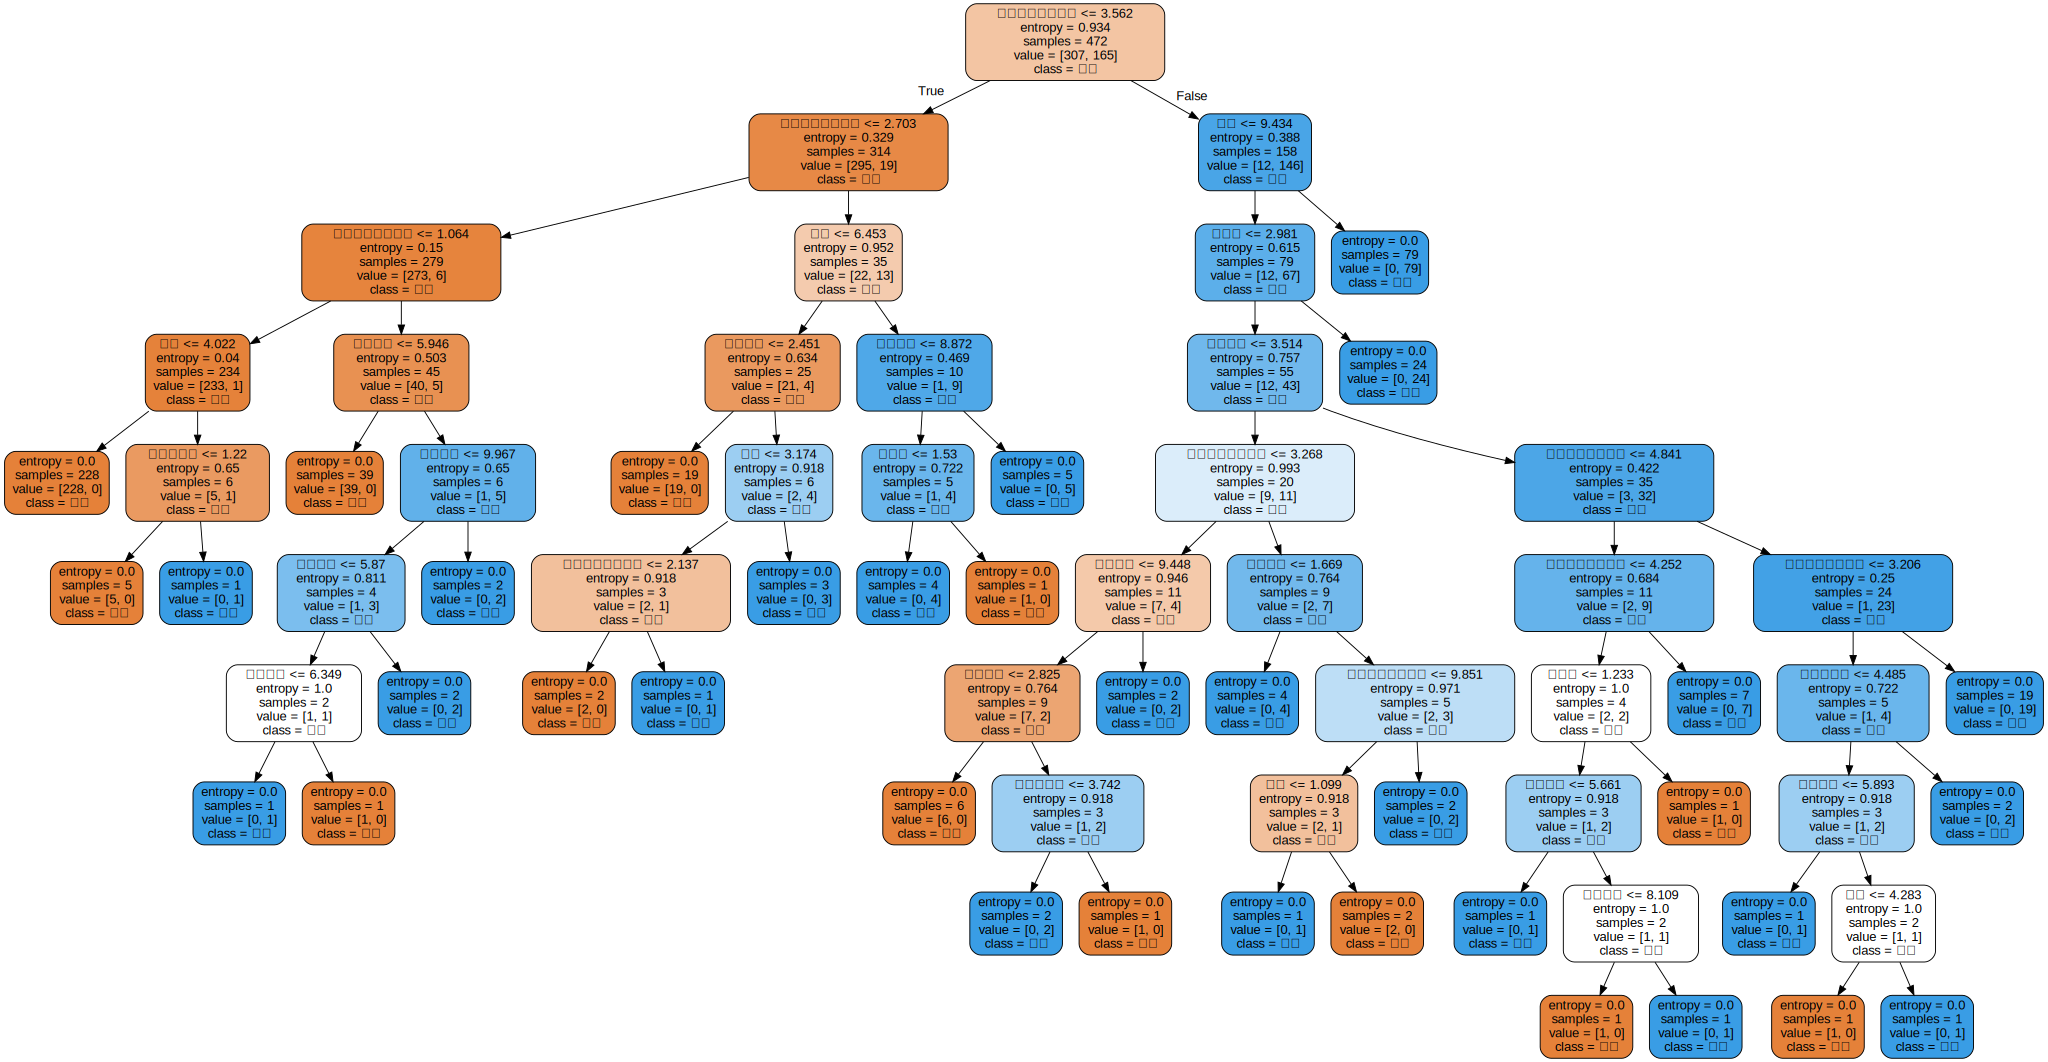

In [16]:
feature_name = ['团块厚度','细胞大小的均匀性','细胞形状的均匀性','边缘附着力','单层上皮细胞大小','裸核','乏味染色质','正常核仁','线粒体']
dot_data = tree.export_graphviz(clf,out_file = None,
                                feature_names= feature_name,
                                class_names=["良性","恶性"],
                                filled=True,
                                rounded=True)

graph = graphviz.Source(dot_data)
graph

In [17]:
[*zip(feature_name,clf.feature_importances_)]

[('团块厚度', 0.05901106843229472),
 ('细胞大小的均匀性', 0.00759763182921156),
 ('细胞形状的均匀性', 0.7208828089424835),
 ('边缘附着力', 0.008849837957288758),
 ('单层上皮细胞大小', 0.017512560865489964),
 ('裸核', 0.08712451451223424),
 ('乏味染色质', 0.008190674715965926),
 ('正常核仁', 0.06410064752352787),
 ('线粒体', 0.026730255221503536)]

In [18]:
# 可以进行网格搜索 用GridSearchCV寻找最优参数（字典） 
# 导入库
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param = {'criterion':['gini','entropy'],'max_depth':[ int(x) for x in list(np.linspace(1,10,10)) ],'min_samples_leaf':[2,3,4,5,10],'min_impurity_decrease':[0.1,0.2,0.5]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=10)
grid.fit(Xtrain, Ytrain) 
print('最优分类器:',grid.best_params_,'最优分数:', grid.best_score_)  # 得到最优的参数和分值

最优分类器: {'criterion': 'entropy', 'max_depth': 2, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} 最优分数: 0.917331560283688


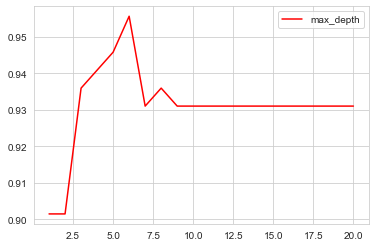

0.9556650246305419
6


In [19]:
#限制树的最大深度，超过设定深度的树枝全部剪掉
import matplotlib.pyplot as plt
test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
            ,criterion="entropy"
            ,random_state=30
            ,splitter="random")
    
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,21),test,color="red",label="max_depth")
plt.legend()
plt.show()


print(max(test))
print(test.index(max(test))+1)
# 在 max_depth=6 时，得分最高

In [20]:
clf = tree.DecisionTreeClassifier(max_depth=8
        ,criterion="gini"
        ,random_state=30
        ,splitter="random")

clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9458128078817734

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0) # 随机森林实例化
# 训练
rfc = rfc.fit(Xtrain,Ytrain)
# 得分
score_Random_Forest = rfc.score(Xtest,Ytest)
print(score_Random_Forest)

[*zip(feature_name,rfc.feature_importances_)]

0.9753694581280788


[('团块厚度', 0.04621967161575563),
 ('细胞大小的均匀性', 0.3147634925426138),
 ('细胞形状的均匀性', 0.20993362209307567),
 ('边缘附着力', 0.0317782213551861),
 ('单层上皮细胞大小', 0.1082379287870144),
 ('裸核', 0.1189419843741161),
 ('乏味染色质', 0.07898339962354152),
 ('正常核仁', 0.08135215782135127),
 ('线粒体', 0.009789521787345512)]

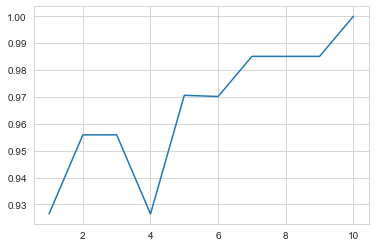

In [22]:
# 随机森林交叉验证
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,X,y,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.show()


0.9719490781387181 34


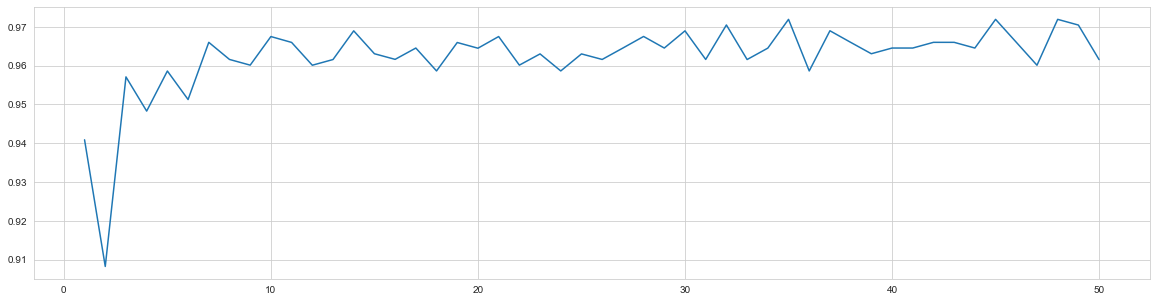

In [23]:
#n_estimators的学习曲线
superpa = []
for i in range(50):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,X,y,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,51),superpa)
plt.show()